# IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### READ THE CSV

In [9]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Dichotomize the dummies

In [10]:
dummies = pd.get_dummies(df['cp'])
dummies

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [11]:
catColumns = ['cp']
catColumns

['cp']

### Get the dummies

In [5]:
dfDummies = df.drop(columns=catColumns)
dfDummies

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
dfDummies = dfDummies.join(dummies)
dfDummies

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0,1,2,3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0
301,57,1,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0


In [13]:
dfDummies = dfDummies.rename(columns={0: "ta", 1: "aa",
                                   2: "na", 3: "as"})
dfDummies

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ta,aa,na,as
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0
301,57,1,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0


### Find the Correlations

In [14]:
dfDummies.corr()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ta,aa,na,as
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.138253,-0.147399,-0.059432,0.047516
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,0.089621,-0.041249,-0.116588,0.088043
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.021447,-0.081851,-0.045107,0.151343
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.070684,-0.012750,-0.037918,-0.050589
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.060190,-0.060649,0.083679,0.055511
restecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.094591,0.077859,0.084196,-0.074654
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.376561,0.248317,0.165475,0.079082
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.469061,-0.233863,-0.271028,-0.093384
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.280243,-0.277513,-0.132444,0.086959
slope,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877,-0.216056,0.202807,0.109769,-0.064509


### Make a Heatmap of the correlations

<AxesSubplot:>

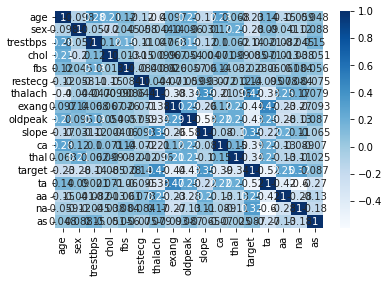

In [17]:
sns.heatmap(dfDummies.corr(), annot=True, cmap="Blues")


# Start the Linear Regression

## Model No. 1: Using all input variables

### List the input and output variables

In [60]:
OUTPUT_VARS  = ["target"]
INPUT_VARS = ["fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "ta", "aa", "na", "as"]
OUTPUT_VARS
INPUT_VARS

['fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'ta',
 'aa',
 'na',
 'as']

### Start the Training: Split the groups into test and training

In [61]:
df_train, df_test = train_test_split(dfDummies, test_size = 0.1, random_state=42)
display(df_train)
display(df_test)
display(len(df_test))

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ta,aa,na,as
284,61,1,140,207,0,0,138,1,1.9,2,1,3,0,1,0,0,0
198,62,1,120,267,0,1,99,1,1.8,1,2,3,0,1,0,0,0
42,45,1,104,208,0,0,148,1,3.0,1,0,2,1,1,0,0,0
17,66,0,150,226,0,1,114,0,2.6,0,0,2,1,0,0,0,1
168,63,1,130,254,0,0,147,0,1.4,1,1,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,140,233,0,1,163,0,0.6,1,1,3,0,0,0,1,0
71,51,1,94,227,0,1,154,1,0.0,2,1,3,1,0,0,1,0
106,69,1,160,234,1,0,131,0,0.1,1,1,2,1,0,0,0,1
270,46,1,120,249,0,0,144,0,0.8,2,0,3,0,1,0,0,0


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ta,aa,na,as
179,57,1,150,276,0,0,112,1,0.6,1,1,1,0,1,0,0,0
228,59,1,170,288,0,0,159,0,0.2,1,0,3,0,0,0,0,1
111,57,1,150,126,1,1,173,0,0.2,2,1,3,1,0,0,1,0
246,56,0,134,409,0,0,150,1,1.9,1,2,3,0,1,0,0,0
60,71,0,110,265,1,0,130,0,0.0,2,1,2,1,0,0,1,0
9,57,1,150,168,0,1,174,0,1.6,2,0,2,1,0,0,1,0
119,46,0,138,243,0,0,152,1,0.0,1,0,2,1,1,0,0,0
223,56,0,200,288,1,0,133,1,4.0,0,2,3,0,1,0,0,0
268,54,1,122,286,0,0,116,1,3.2,1,2,2,0,1,0,0,0
33,54,1,125,273,0,0,152,0,0.5,0,1,2,1,0,0,1,0


31

### Perform Regression

In [62]:
all_model = LinearRegression()
all_model.fit(df_train[INPUT_VARS], df_train[OUTPUT_VARS])
display(all_model.coef_)
display(all_model.intercept_) 

array([[-0.01864754,  0.06272575,  0.00218376, -0.17595616, -0.06020525,
         0.09494339, -0.1153928 , -0.1444117 , -0.18721825,  0.00984896,
         0.07756953,  0.09979976]])

array([0.64319293])

In [63]:
all_model.predict(df_test[INPUT_VARS])

array([[ 0.32361522],
       [ 0.73987754],
       [ 0.77184873],
       [-0.07588498],
       [ 0.77167411],
       [ 0.96819718],
       [ 0.41806982],
       [-0.35303084],
       [-0.0839879 ],
       [ 0.61837495],
       [ 0.76834629],
       [ 0.37354052],
       [ 0.98039645],
       [ 0.07026478],
       [ 0.9924375 ],
       [ 1.01490239],
       [ 0.993969  ],
       [ 0.22749328],
       [-0.07265147],
       [ 0.02697662],
       [ 0.70706041],
       [-0.04326539],
       [ 0.41966202],
       [ 0.71573222],
       [ 0.78153386],
       [ 0.67061241],
       [ 0.91702589],
       [ 0.587261  ],
       [-0.03656216],
       [ 0.70425567],
       [ 0.10631336]])

### Get the predicted values

In [64]:
all_predict = pd.DataFrame(all_model.predict(df_test[INPUT_VARS]), columns=["predicted target"])
all_predict = all_predict.join(df_test.reset_index(drop=True))
all_predict

,predicted target,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ta,aa,na,as
0,0.323615,57,1,150,276,0,0,112,1,0.6,1,1,1,0,1,0,0,0
1,0.739878,59,1,170,288,0,0,159,0,0.2,1,0,3,0,0,0,0,1
2,0.771849,57,1,150,126,1,1,173,0,0.2,2,1,3,1,0,0,1,0
3,-0.075885,56,0,134,409,0,0,150,1,1.9,1,2,3,0,1,0,0,0
4,0.771674,71,0,110,265,1,0,130,0,0.0,2,1,2,1,0,0,1,0
5,0.968197,57,1,150,168,0,1,174,0,1.6,2,0,2,1,0,0,1,0
6,0.418070,46,0,138,243,0,0,152,1,0.0,1,0,2,1,1,0,0,0
7,-0.353031,56,0,200,288,1,0,133,1,4.0,0,2,3,0,1,0,0,0
8,-0.083988,54,1,122,286,0,0,116,1,3.2,1,2,2,0,1,0,0,0
9,0.618375,54,1,125,273,0,0,152,0,0.5,0,1,2,1,0,0,1,0


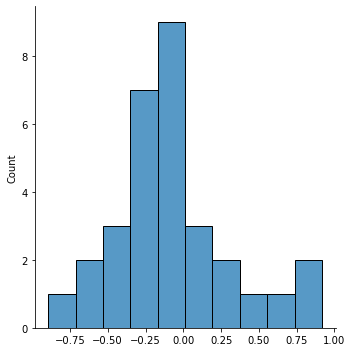

In [45]:
sns.displot(all_predict["predicted target"] - all_predict["target"])

### Score Model No. 1 

In [65]:
all_model.score(df_test[INPUT_VARS], df_test[OUTPUT_VARS])

0.3970105074472591

## Model 2: Select new inputs vars with highest correlation: ta exang oldpeak ca

In [ ]:
OUTPUT_VARS  = ["target"]
INPUT_VARS = ["thalach", "exang", "oldpeak", "slope", "ca"]
OUTPUT_VARS
INPUT_VARS

In [66]:
OUTPUT_VARS  = ["target"]
INPUT_VARS = ["exang", "oldpeak", "slope", "ca", "ta"]
OUTPUT_VARS
INPUT_VARS

['exang', 'oldpeak', 'slope', 'ca', 'ta']

In [67]:
new_model = LinearRegression()
new_model.fit(df_train[INPUT_VARS], df_train[OUTPUT_VARS])
display(new_model.coef_)
display(new_model.intercept_) 

array([[-0.22261496, -0.07019231,  0.10526833, -0.1300668 , -0.28875051]])

array([0.76966998])

In [68]:
new_predict = pd.DataFrame(new_model.predict(df_test[INPUT_VARS]), columns=["predicted target"])
new_predict = new_predict.join(df_test.reset_index(drop=True))
new_predict

,predicted target,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ta,aa,na,as
0,0.191391,57,1,150,276,0,0,112,1,0.6,1,1,1,0,1,0,0,0
1,0.860900,59,1,170,288,0,0,159,0,0.2,1,0,3,0,0,0,0,1
2,0.836101,57,1,150,126,1,1,173,0,0.2,2,1,3,1,0,0,1,0
3,-0.029926,56,0,134,409,0,0,150,1,1.9,1,2,3,0,1,0,0,0
4,0.850140,71,0,110,265,1,0,130,0,0.0,2,1,2,1,0,0,1,0
5,0.867899,57,1,150,168,0,1,174,0,1.6,2,0,2,1,0,0,1,0
6,0.363573,46,0,138,243,0,0,152,1,0.0,1,0,2,1,1,0,0,0
7,-0.282598,56,0,200,288,1,0,133,1,4.0,0,2,3,0,1,0,0,0
8,-0.121176,54,1,122,286,0,0,116,1,3.2,1,2,2,0,1,0,0,0
9,0.604507,54,1,125,273,0,0,152,0,0.5,0,1,2,1,0,0,1,0


### Score Model No. 2

In [69]:
new_model.score(df_test[INPUT_VARS], df_test[OUTPUT_VARS])

0.33755279184485887

### Conclusion: The first model is more accurate because it has more information